In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

Importamos los archivos 

In [3]:
items_games = pd.read_parquet('..\\Archivos API\\items_games_API.parquet')
reviews_games = pd.read_parquet('..\\Archivos API\\reviews_games.parquet')
steam_games = pd.read_parquet('..\\Dataset\\steam_games.parquet')

Visualizamos los datos

In [10]:
items_games.head()

,genres,year_release,playtime_forever,user_id
0,Action,2000,6,76561197970982479
1,Action,2000,0,js41637
2,Action,2000,0,Riot-Punch
3,Action,2000,93,doctr
4,Action,2000,108,corrupted_soul


In [11]:
reviews_games.head()

,user_id,posted,item_id,recommend,sentiment_analysis,year_posted,title,genres,release_date,year_release
0,76561197970982479,2011-11-05,1250,1,2,2011,Killing Floor,Action,2009-05-14,2009
1,death-hunter,2015-03-30,1250,1,2,2015,Killing Floor,Action,2009-05-14,2009
2,DJKamBer,2013-07-12,1250,1,0,2013,Killing Floor,Action,2009-05-14,2009
3,diego9031,2015-08-13,1250,1,1,2015,Killing Floor,Action,2009-05-14,2009
4,76561198081962345,2014-04-05,1250,1,1,2014,Killing Floor,Action,2009-05-14,2009


In [16]:
steam_games.head()

,item_id,title,genres,tags,specs,release_date
0,761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018-01-04
1,643980,Ironbound,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018-01-04
2,670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017-07-24
3,767400,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],2017-12-07
4,772540,Battle Royale Trainer,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",2018-01-04


En el Data Frame `steam_games`, de la columna `release_date`, extraemos el año en una nueva columna llamada `year_release`

In [4]:
steam_games['year_release'] = steam_games['release_date'].dt.year
steam_games.head()

,item_id,title,genres,tags,specs,release_date,year_release
0,761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018-01-04,2018
1,643980,Ironbound,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018-01-04,2018
2,670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017-07-24,2017
3,767400,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],2017-12-07,2017
4,772540,Battle Royale Trainer,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",2018-01-04,2018


# Gráficos


Cantidad de productos lanzados por año

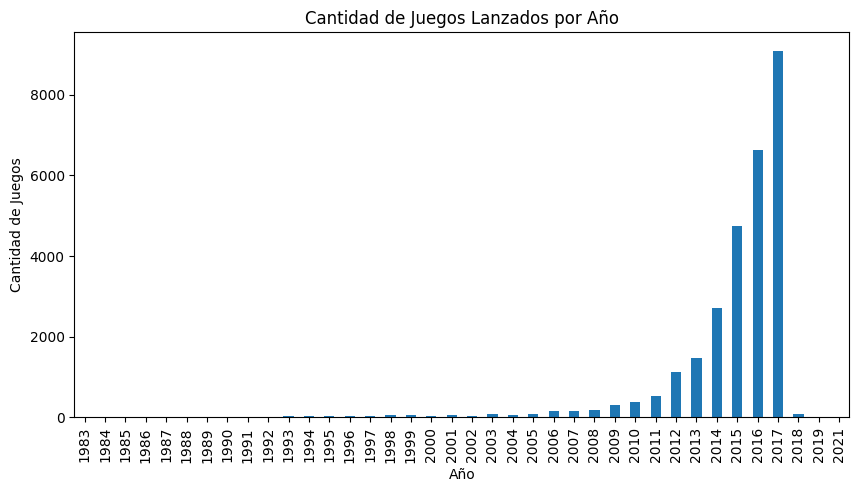

In [28]:
# Calculamos la cantidad de productos lanzados por año
games_per_year = steam_games.groupby('year_release')['item_id'].nunique()

# Graficamos
plt.figure(figsize=(10, 5))
games_per_year.plot(kind='bar')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.show()


Cantidad de jugadores por año

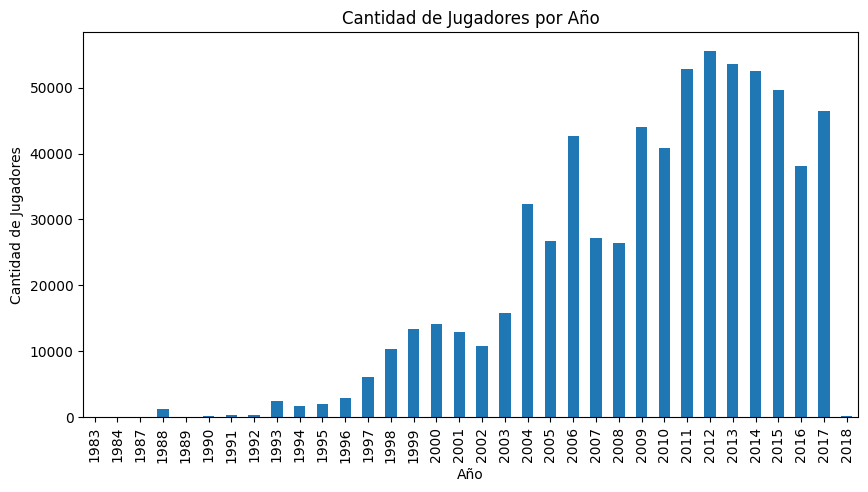

In [29]:
# Calculamos la cantidad de jugadores por año
players_per_year = items_games.groupby('year_release')['user_id'].nunique()

# Graficamos
plt.figure(figsize=(10, 5))
players_per_year.plot(kind='bar')
plt.title('Cantidad de Jugadores por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Jugadores')
plt.show()


Tiempo de juego por género

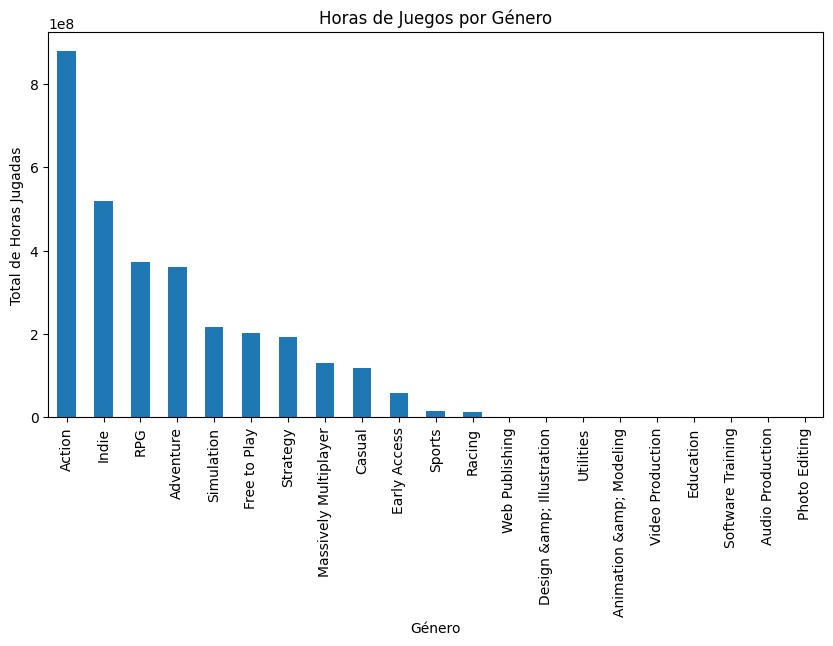

In [30]:
# Calculamos el tiempo jugado por genero
playtime_per_genre = items_games.groupby('genres')['playtime_forever'].sum()

# Ordenamos de mayor a menor
playtime_per_genre = playtime_per_genre.sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(10, 5))
playtime_per_genre.plot(kind='bar', stacked=True)
plt.title('Horas de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Total de Horas Jugadas')
plt.show()

Tiempo de juego por año 

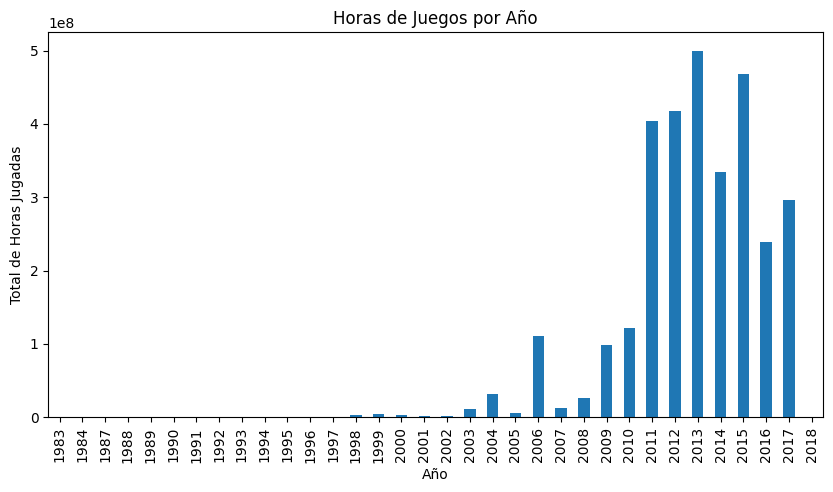

In [31]:
# Calculamos el tiempo jugado por año
playtime_per_year = items_games.groupby('year_release')['playtime_forever'].sum()

# Graficamos
plt.figure(figsize=(10, 5))
playtime_per_year.plot(kind='bar', stacked=True)
plt.title('Horas de Juegos por Año')
plt.xlabel('Año')
plt.ylabel('Total de Horas Jugadas')
plt.show()

Porcentaje de cada tipo de sentimiento sobre el total de reseñas

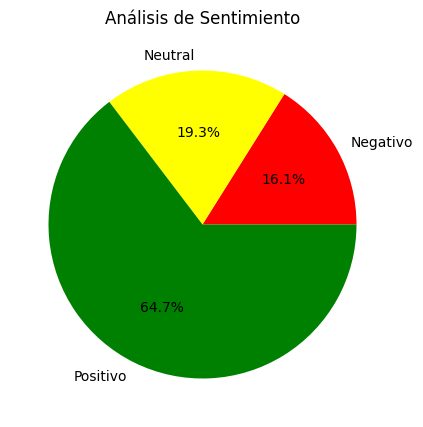

In [33]:
# Contamos la cantidad de reseñas de cada valor en la columna 'sentiment_analysis'
positive = reviews_games[reviews_games['sentiment_analysis']==2].shape[0]  # Número de filas de sentimientos positivos (2)
neutral = reviews_games[reviews_games['sentiment_analysis']==1].shape[0]   # Número de filas de sentimientos neutros (1)
negative = reviews_games[reviews_games['sentiment_analysis']==0].shape[0]  # Número de filas de sentimientos negativos (0)

# Graficamos
plt.figure(figsize=(5, 5))
plt.pie([negative, neutral, positive], labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%', colors=['red', 'yellow', 'green'])

plt.title('Análisis de Sentimiento')
plt.show()